In [1]:
import numpy as np
import matplotlib.pyplot as plt

Used libs: pda_utils for manipulating with PDF/CDF and their statistics, maxent_appx is realization of maximum entropy optimization procedure that leads to probability distribution function estimation.   

In [2]:
import pdf_appx.pda_utils as cd
import pdf_appx.maxent_appx as me

Define points of approximation in (0;1) and number of moments (by power, excluding zero power moment ==1) will be used for approximation:

In [3]:
N = 500 
t= np.linspace(0,1,N)
num_moments=9

We have function that creates casual (nearly random) increasing fucntion that determines some CDF and PDF:

In [4]:
getcdf = cd.casual_increasing_function()
print(type(getcdf))

<class 'scipy.interpolate._cubic.PchipInterpolator'>


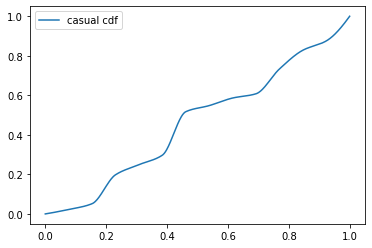

In [5]:
Mycdf = getcdf(t)
plt.plot(t, Mycdf, label='casual cdf')
plt.legend()
plt.show()

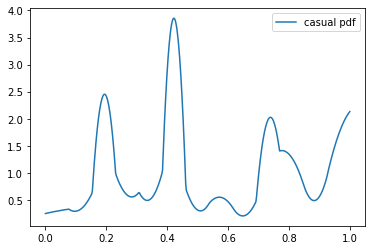

In [6]:
getpdf = getcdf.derivative(1)
Mypdf = getpdf(t)

plt.plot(t, Mypdf, label='casual pdf')
plt.legend()
plt.show()

Get moments of rhis function and use them in maxent-optimization to estimate PDF

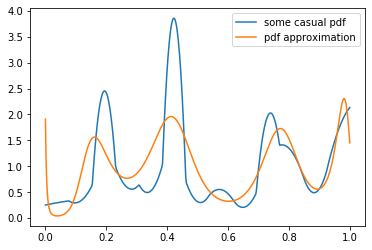

In [7]:
moments = cd.moments_from_cdf(getcdf,num_moments)
maxent_approx_1 =  me.pdf_approx(moments)
pdf_hat = maxent_approx_1(t)   
plt.plot(t, Mypdf, label='some casual pdf')    
plt.plot(t,pdf_hat, label='pdf approximation')
plt.legend()    
plt.show()

 Now create pdf approximation for the random data sample. We will use uniform distributed samples transformed by casual increasing function.

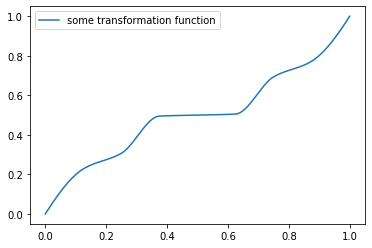

In [8]:
gettransform = cd.casual_increasing_function()
Mytransform = gettransform(t)

plt.plot(t, Mytransform, label='some transformation function')
plt.legend()
plt.show()

samples_uni = np.random.rand(10000)
samples = gettransform(samples_uni)


Lets get optimization from estimation of moments

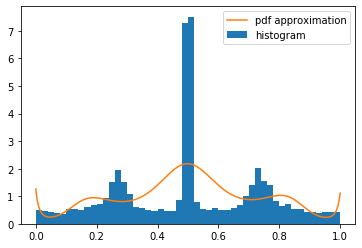

In [9]:
moments_star = cd.moments_from_samples(samples, num_moments)
maxent_approx_2 =  me.pdf_approx(moments_star)

pdf_star_hat = maxent_approx_2(t)

plt.hist(samples, bins=50, label = 'histogram', density = True) 
plt.plot(t,pdf_star_hat, label='pdf approximation')
plt.legend()    
plt.show()

Sometimes we can catch instabilities during optimization procedure due to moments of high order.